# XGBOOST

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
path = "../0.dataset/Social_Network_Ads.csv"
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
# variables dummies
new_df = df.copy()

# convertir de categorico a numerico
df_dummies = pd.get_dummies(df['Gender'], drop_first = True) 

# Concatenamos las variables binarias al DataFrame
new_df = pd.concat([new_df, df_dummies], axis = 1)

# Eliminamos la vairable original race
new_df.drop(columns=['Gender'], axis=1, inplace=True)

# renombrar columna
new_df.rename(columns = {'Male': 'Gender_Male'}, inplace=True)

new_df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1


In [7]:
# eliminar columna con valor de correlacion prox a cero
""" new_df_2 = new_df.drop(["User ID","Gender_Male"],axis=1)
new_df_2.head() """
new_df = new_df.drop(["User ID"],axis=1)

In [8]:
# separar data y variale objetivo
X = new_df.drop("Purchased", axis=1)
y = new_df["Purchased"]

In [10]:
# Escalado o normalizacion de los datos

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_x.fit(X)

# =========== TRANSFORMANDO =========== 
X = scaler_x.transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Creación de una matriz DMatrix: XGBoost requiere que los datos se almacenen en una matriz DMatrix. Puedes crear una matriz DMatrix a partir de los conjuntos de entrenamiento y prueba de la siguiente manera:

In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

* Definición de los parámetros del modelo: XGBoost tiene muchos parámetros que puedes ajustar para obtener el mejor rendimiento para tu problema. Algunos de los parámetros clave incluyen el número de árboles (num_boost_round), la tasa de aprendizaje (learning_rate), la profundidad máxima de cada árbol (max_depth), etc. Aquí hay un ejemplo de cómo puedes definir los parámetros:

In [49]:
params = {
    'objective': 'binary:logistic',  # Para clasificación binaria
    'eval_metric': 'error',  # Métrica de evaluación del modelo
    'max_depth': 3,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8,
    'subsample': 0.9
}


In [50]:
num_boost_round = 3  # Número de árboles
model = xgb.train(params, dtrain, num_boost_round)

In [51]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(dtest)
# Convertir las predicciones en etiquetas
predictions = [round(value) for value in y_pred]

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Exactitud del modelo: %.2f%%" % (accuracy * 100.0))


Exactitud del modelo: 92.50%


## CLASIFICACION TITANIC

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [53]:
df = pd.read_csv("../0.dataset/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Choosing features: Feature Selection

In [62]:
titanic_df = df[["Pclass","Sex","Age","Survived","Parch","SibSp"]]
titanic_df.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


### Encoding variables

In [63]:
titanic_df["Sex"] = titanic_df["Sex"].map({'male':1,'female':0})
titanic_df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_1752\1663243831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Sex"] = titanic_df["Sex"].map({'male':1,'female':0})


,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,1,22.0,0,0,1
1,1,0,38.0,1,0,1
2,3,0,26.0,1,0,0
3,1,0,35.0,1,0,1
4,3,1,35.0,0,0,0


### Eliminar variables nulos

In [64]:
titanic_df = titanic_df.dropna()

### Seleccionar output y features

In [65]:
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

In [ ]:
# Normalizacion


### Split train and test

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

### Choosing classifier

In [67]:
model = XGBClassifier()

### fitting model

In [68]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

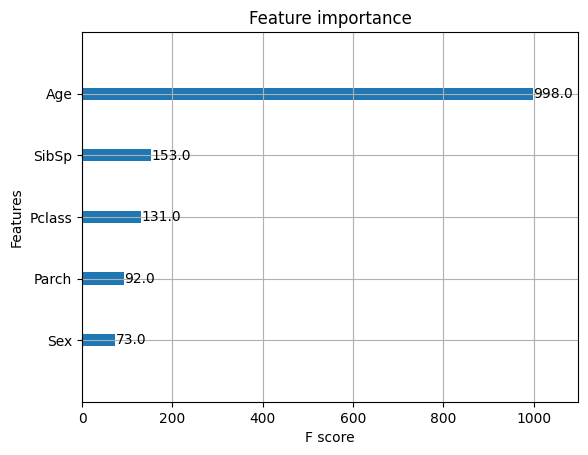

In [69]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, ax=plt.gca())

### predicting new values

In [70]:
y_pred = model.predict(X_test)

In [80]:
X_test.head(5)

,Pclass,Sex,Age,Parch,SibSp
423,3,0,28.00,1,1
177,1,0,50.00,0,0
305,1,1,0.92,2,1
292,2,1,36.00,0,0
889,1,1,26.00,0,0


In [74]:
print(list(y_test[:5]))
print(y_pred[:5])

[0, 0, 1, 0, 1]
[0 1 1 0 1]


### Accuracy

training accuracy

In [81]:
model.score(X_train,y_train)

0.9289719626168225

In [82]:
y_pred_train = model.predict(X_train)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[311,  10],
       [ 28, 186]], dtype=int64)

testing accuracy

In [85]:
model.score(X_test,y_test)

0.7821229050279329

In [86]:
y_pred = model.predict(X_test)

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 16],
       [23, 53]], dtype=int64)

## Mejorando con grid search

In [89]:
pd.crosstab(y_train,columns='count') # observando la distribucion de datos por label

col_0,count
Survived,
0,321
1,214


In [90]:
pd.crosstab(y_test,columns='count')

col_0,count
Survived,
0,103
1,76


### Cross-validation

In [91]:
from sklearn.model_selection import cross_val_score

clf = XGBClassifier()

scores = cross_val_score(clf, X_train, y_train, cv=5) # 5 subgrupos de entrenamiento
scores

array([0.78504673, 0.77570093, 0.71962617, 0.81308411, 0.91588785])

In [94]:
print(f" {round(scores.mean(),3)}:Accuracy with standard deviation {scores.std()}")

 0.802:Accuracy with standard deviation 0.06458748614269531


## Mejora contra Overfitting en XGBoost y Clasificacion

In [103]:
model = XGBClassifier()
#model.fit(X_train,y_train)
eval_set = [(X_train,y_train),(X_test, y_test)]
model.fit(X_train,y_train,
          eval_metric = ["error", "logloss"], # 1-accuracy #"m"-> ["merror", "mlogloss"] es para multiclasificacion
          early_stopping_rounds = 10,
          eval_set = eval_set,
          verbose = True
          )

[0]	validation_0-error:0.14019	validation_0-logloss:0.55243	validation_1-error:0.22346	validation_1-logloss:0.57893
[1]	validation_0-error:0.14019	validation_0-logloss:0.47007	validation_1-error:0.22905	validation_1-logloss:0.52374
[2]	validation_0-error:0.12336	validation_0-logloss:0.41639	validation_1-error:0.22905	validation_1-logloss:0.49006
[3]	validation_0-error:0.12336	validation_0-logloss:0.38529	validation_1-error:0.22346	validation_1-logloss:0.47243
[4]	validation_0-error:0.11963	validation_0-logloss:0.36015	validation_1-error:0.22346	validation_1-logloss:0.46240
[5]	validation_0-error:0.11776	validation_0-logloss:0.34117	validation_1-error:0.21788	validation_1-logloss:0.46029
[6]	validation_0-error:0.11402	validation_0-logloss:0.32905	validation_1-error:0.21788	validation_1-logloss:0.46053
[7]	validation_0-error:0.11589	validation_0-logloss:0.31973	validation_1-error:0.22905	validation_1-logloss:0.45906
[8]	validation_0-error:0.11402	validation_0-logloss:0.31272	validation_1

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.770949720670391


## 

In [107]:
# retrieve the performance
result = model.evals_result()
epoch = len(result["validation_0"]["error"])
x_axis = range(0, epoch)

In [108]:
from sklearn.metrics import classification_report

y_pred_train = model.predict(X_train)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       321
           1       0.90      0.79      0.85       214

    accuracy                           0.88       535
   macro avg       0.89      0.87      0.88       535
weighted avg       0.89      0.88      0.88       535

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.75      0.70      0.72        76

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### log loss

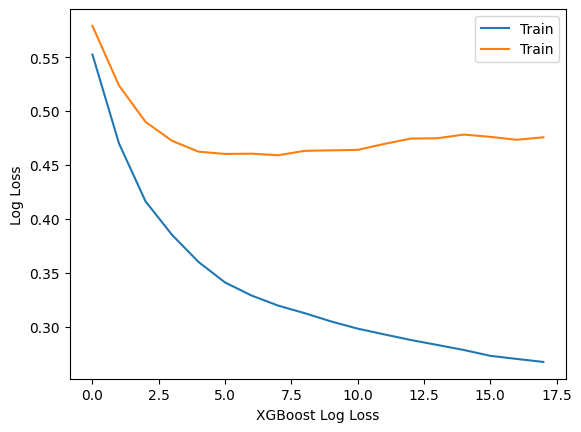

In [109]:
# PLOT LOG LOSS
fig, ax = plt.subplots()
ax.plot(x_axis, result["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, result["validation_1"]["logloss"], label="Train")
ax.legend()
plt.ylabel("Log Loss")
plt.xlabel("XGBoost Log Loss")
plt.show()

## plot accuracy

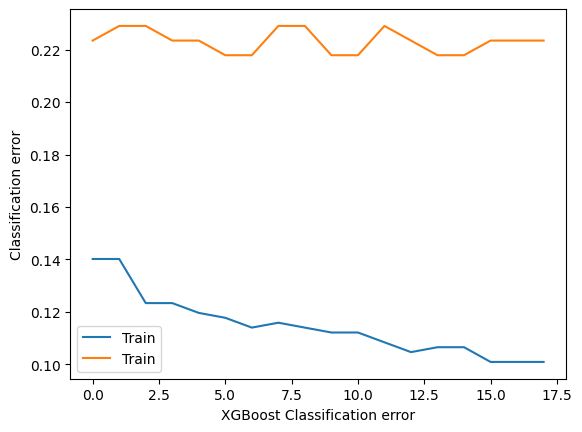

In [110]:
# PLOT classification error
fig, ax = plt.subplots()
ax.plot(x_axis, result["validation_0"]["error"], label="Train")
ax.plot(x_axis, result["validation_1"]["error"], label="Train")
ax.legend()
plt.ylabel("Classification error")
plt.xlabel("XGBoost Classification error")
plt.show()

## GRID SEARCH

In [111]:
from sklearn.model_selection import GridSearchCV

gbc = XGBClassifier(gpu_id=0, tree_method = "gpu_hist") # no es nesario sino se cuenta con gpu

# parametros del grid para el XGBoost
grid_values = {
    #'estimators':[100],
    'learning_rate':[0.05, 0.1, 0.2],
    'min_child_weight':[1, 5],
    'gamma':[0.5, 1, 2], # min perdida para ir creando las hojas
    'subsample':[0.6, 0.8], # nro de obs(row) utilizadas para crear los arboles
    'colsample_bytree':[0.6, 0.8], # nro de columns utilizadas para crear los arboles
    'max_depth':[4,5,6]
}

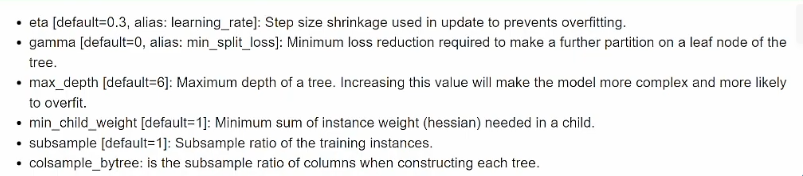

In [112]:
clf = GridSearchCV(gbc, param_grid=grid_values, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [0.5, 1, 2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1, 5],
                         'subsample': [0.6, 0.8]})

In [113]:
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Best score found on development set:")
print(clf.best_score_)

Best parameters set found on development set:
{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}
Best score found on development set:
0.8261682242990653


In [114]:
clf.score(X_test,y_test)

0.7877094972067039

## usando Cat Boost

In [118]:
from catboost import CatBoostClassifier

# Initialize catboost classifier
model = CatBoostClassifier(
    iterations=10,
    learning_rate=0.3,
    depth=2,
    loss_function='Logloss',# 'MultiClass'
    task_type='GPU',
    devices='0.1'
)

In [119]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


0:	learn: 0.5936212	total: 48.1ms	remaining: 433ms
1:	learn: 0.5399256	total: 53.7ms	remaining: 215ms
2:	learn: 0.5030427	total: 59.8ms	remaining: 140ms
3:	learn: 0.4830301	total: 68.4ms	remaining: 103ms
4:	learn: 0.4689924	total: 73.4ms	remaining: 73.4ms
5:	learn: 0.4561003	total: 79.8ms	remaining: 53.2ms
6:	learn: 0.4473339	total: 85.6ms	remaining: 36.7ms
7:	learn: 0.4410608	total: 91.2ms	remaining: 22.8ms
8:	learn: 0.4350136	total: 96.6ms	remaining: 10.7ms
9:	learn: 0.4286395	total: 103ms	remaining: 0us


In [121]:
model.score(X_test, y_test)

0.7877094972067039